<a href="https://colab.research.google.com/github/abhi-11nav/Wine-Quality-Prediction/blob/main/Wine_Quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Credits

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [14]:
# Import libraries for data import and manipulation

import pandas as pd
import numpy as np 

In [15]:
# Link to dataset uploaded on github repository 

raw_data_path = "https://raw.githubusercontent.com/abhi-11nav/Wine-Quality-Prediction/main/winequality-red.csv"

In [16]:
# Importing the data and storing it in a variable 

dataset = pd.read_csv(raw_data_path)

In [17]:
# Printing out the first 5 rows of the dataset

dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
# Features of the dataset

dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

"Quality" is the dependent feature and the rest are independent features of the dataset 

In [19]:
# Let us check for any missing values in the dataset

dataset.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Well, there are no missing values in the dataset

In [20]:
# Importing visualization libraries

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

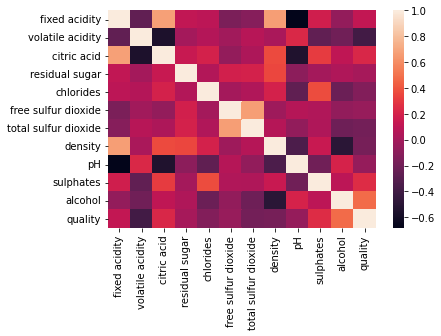

In [24]:
# Plotting the heatmamp between variables correlation

sns.heatmap(dataset.corr())

We have some features that seem correlated , Let us explore these pairs a bit more:

[citric acid, fixed acidity], [density - fixed acidity], [pH, fixed acidity], [total suflur dioxide, free sulfur dioxide]


In [31]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


#### The following correlations are taken a note of :



[citric acid, fixed acidity] : 0.67

[density, fixed acidity] : 0.66

[pH, fixed acidity] : -0.68

[total suflur dioxide, free sulfur dioxide] : 0.66